In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Continous Value Data Generation:

In [ ]:
class contValData():

  def random_seed(rseed):
    np.random.seed(rseed)

  def create(self, D, N, r=20):
    self.X = np.linspace(0, r, N).reshape(N, D)
    self.y = np.sqrt(self.X) + np.exp(-(self.X - 5)**2) - 2 * (np.exp(-(self.X-12.5)**2) + np.random.randn(N, 1)*0.2)
    return self.X, self.y
  
  def show(self):
    plt.figure()
    plt.scatter(self.X, self.y)


In [ ]:
dat = contValData()

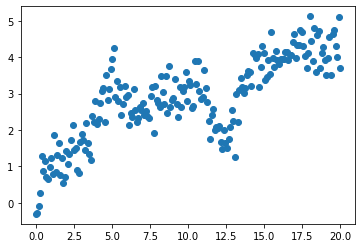

In [ ]:
X1, y1 = dat.create(1,200)
dat.show()

In [ ]:
class KNNRegressor():

  def fit(self, X, y):
    self.X = X
    self.y = y
  
  def predict(self, X, K, epsilon = 1e-3):
    N=len(X)
    y_hat = np.zeros(N)

    for i in range(N):  
      dist2 = np.sum((self.X-X[i])**2, axis=1)
      idxt = np.argsort(dist2)[:K]
      gamma_k= np.exp(-dist2[idxt])/np.exp(-dist2[idxt]).sum()
      y_hat[i]= gamma_k.dot(self.y[idxt])

    return y_hat

In [ ]:
knn_reg = KNNRegressor()

In [ ]:
knn_reg.fit(X1, y1)

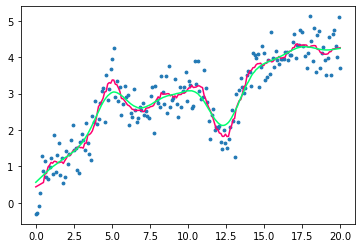

In [ ]:
y_hat = knn_reg.predict(X1, 10)
y_hat2 =knn_reg.predict(X1, 30)

plt.figure()
plt.scatter(X1, y1, s=8)
plt.plot(X1, y_hat, color = "#FF0070")
plt.plot(X1, y_hat2,color = "#00FF70")

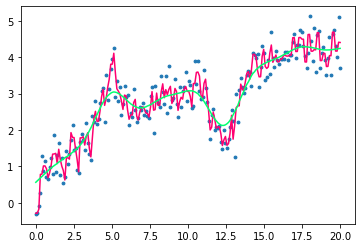

In [ ]:
y_hat = knn_reg.predict(X1, 2)
y_hat2 =knn_reg.predict(X1, 30)

plt.figure()
plt.scatter(X1, y1, s=8)
plt.plot(X1, y_hat, color = "#FF0070")
plt.plot(X1, y_hat2,color = "#00FF70")

In [ ]:
def R2(Y, Y_hat):
  #return 1-np.sum((Y-Y_hat)**2)/np.sum((Y-np.mean(Y))**2)
  return 1 - (np.sum(Y-Y_hat)**2 / np.sum(Y-(np.mean(Y))**2))

In [ ]:
R2(y1, y_hat)

5.376073158524389

In [ ]:
class SimpleLinearReg():

  def fit(self, X, y):
    self.y = y
    self.d = np.mean(X**2)-np.mean(X)**2
    self.w0= (np.mean(y)*np.mean(X**2)-np.mean(X)*np.mean(X*y))/self.d
    self.w1= (np.mean(X*y)-(np.mean(X)*np.mean(y)))/self.d

  def predict(self, X, show=0):
    y_hat = self.w0+self.w1*X

    if show:
      plt.figure()
      plt.scatter(X, self.y, s=8)
      plt.plot(X, y_hat, color="#FF0070")

    return y_hat


In [ ]:
slr = SimpleLinearReg()

In [ ]:
slr.fit(X1,y1)

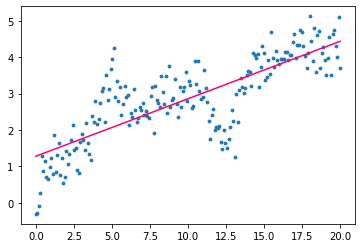

In [ ]:
y_hat_slr = slr.predict(X1, show=1)

In [ ]:
np.sum((y1-y_hat_slr)**2)

95.88919377195751

In [ ]:
y2 = y1**2

In [ ]:
lr2 = SimpleLinearReg()
lr2.fit(X1, y2)

In [ ]:
y_hat_slr2 = lr2.predict(X1)

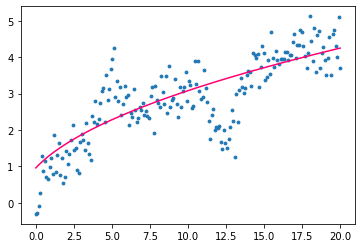

In [ ]:
plt.figure()
plt.scatter(X1, y1, s=8)
plt.plot(X1, np.sqrt(y_hat_slr2), color="#FF0070")

In [ ]:
np.sum((y1-np.sqrt(y_hat_slr2))**2)

91.02001511327313

In [ ]:
np.sum((y1-y_hat_slr)**2)

95.88919377195751

Multivariate Linear Regression

In [ ]:
class LinearRegresion ():

  def fit (self, X, y):
    self.w = np.linalg.solve(X.T@X, X.T@y)
  
  def predict (self, X):
    return np.matmul(X, self.w)


OLS Regressor with Stochastic Gradient Descent

In [ ]:
#Helper Functions

def OLS(Y, Y_hat, N):
  return (1/(2*N))*np.sum((Y-Y_hat)**2)


In [ ]:
class OurLinearRegression():

  def fit(self, X, Y, eta=1e-3, epochs=1e3, show_curve=False):
    print (X.shape)
    print (type(X))

    print (Y.shape)
    print (type(Y))


    epochs = int(epochs)
    N, D = X.shape
    #Y = y

    #Initialize weights
    self.W = np.random.randn(D)

    #Initialize Loss Function
    J= np.zeros(epochs)

    #Gradient Descent

    for epoch in range(epochs):
      Y_hat = self.predict(X)
      J[epoch] = OLS (Y, Y_hat, N)
      self.W -= eta*(1/N)*(X.T@(Y_hat-Y))
    
    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")

  def predict(self,X):
    return X@self.W


Kansas City Housing Data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Enhance IT/Linear Regresion/kc_house_data.csv')

In [ ]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
x=data[['price', 'bedrooms', 'bathrooms', 'condition', 'sqft_above']]

In [ ]:
X=x.to_numpy()

In [ ]:
y=X[:,0]

In [ ]:
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [ ]:
X=X[:,1:]

In [ ]:
X

array([[3.00e+00, 1.00e+00, 3.00e+00, 1.18e+03],
       [3.00e+00, 2.25e+00, 3.00e+00, 2.17e+03],
       [2.00e+00, 1.00e+00, 3.00e+00, 7.70e+02],
       ...,
       [2.00e+00, 7.50e-01, 3.00e+00, 1.02e+03],
       [3.00e+00, 2.50e+00, 3.00e+00, 1.60e+03],
       [2.00e+00, 7.50e-01, 3.00e+00, 1.02e+03]])

In [ ]:
myReg = OurLinearRegression()

(21613, 4)
<class 'numpy.ndarray'>
(21613,)
<class 'numpy.ndarray'>


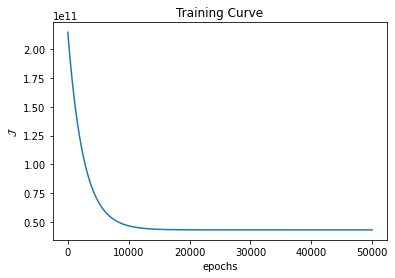

In [ ]:
myReg.fit(X, y, eta=5e-11, epochs=5e4, show_curve = True)

In [ ]:
XTest = np.array([[4,3,5,2440]])

In [ ]:
myReg.predict(XTest)

array([722567.61856673])

In [ ]:
#ESTA ES UNA PRUBEA